# Einführung in die Neuroinformatik - Blatt07

### *Gruppe AC*

**Aufgabe 2**

1.
a)
Für die Neuronen in der 1. Zwischenschicht ergibt sich:  
$x_1 * 1 + y_1 * 1 = 1 \Rightarrow y_{11} = 0$  
$x_2 * 1 + y_2 * 1 = 1 \Rightarrow y_{12} = 0$  
Für die Neuronen in der 2. Zwischenschicht ergibt sich:  
$y_{11} *1 + y_{12} * 1 = 0 \Rightarrow y_{21} = y_{22} = 0$  
Somit erhält man insgesamt: $f(x, y) = y_{21} * 1 + y_{22} * (-1) = 0$  
Dieses Ergebnis entspricht dem erwarteten Ergebnis aus Gleichung 4.

![Erweitertes Netzwerk für $n = 3$](1b.jpg)

c) Die Neuronen aus der 1. Zwischenschicht sind AND-Neuronen und berechnen $x_iy_i$, die Neuronen aus der 2. Zwischenschicht summieren dann die Ergebnisse aus der ersten Zwischenschicht auf, sodass das im Ausgabeneuron auf gerade oder ungerade überprüft werden kann.

2.

a) Schwellwertneuronen können nicht verwendet werden, da die Ableitung der Aktivierungsfunktion benötigt wird und diese für Schwellwertneuronen nicht definiert ist.

In [21]:
import itertools
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [22]:
#Ermittlung aller möglichen Binärkombinationen und der zugehörigen Lehrersignale

def getBinaryCombinations(n):
    return list(itertools.product([0, 1], repeat = n))

def getT(x, y):
    return np.dot(x, y) % 2

def getData(n):
    x = getBinaryCombinations(n)
    y = getBinaryCombinations(n)
    
    data = []
    labels = []
    for i in range(len(x)):
        for j in range(len(y)):
            T = getT(x[i], y[j])
            
            #replace all 0 by -1
            xnew = np.array([-1.0 if x == 0 else 1.0 for x in x[i]])
            ynew = np.array([-1.0 if y == 0 else 1.0 for y in y[j]])
            Tnew = -1 if T == 0 else 1
            
            data.append(np.concatenate((xnew, ynew)))
            labels.append(Tnew)
    
    return np.asarray(data), np.asarray(labels)

In [23]:
def train_network(n_hidden):
    
    # Start fresh and at least try to get reproducible results
    tf.reset_default_graph()
    K.clear_session()
    tf.set_random_seed(42)
    np.random.seed(42)
    
    model = keras.models.Sequential()
    
    for i in range(len(n_hidden)):
        model.add(keras.layers.Dense(n_hidden[i], activation = 'tanh', 
                                        kernel_initializer = keras.initializers.RandomUniform(-0.5, 0.5), 
                                        bias_initializer = keras.initializers.RandomUniform(-0.5, 0.5)))
        
    model.compile(optimizer = keras.optimizers.SGD(lr=0.2, decay=0.0001, momentum=0.9, nesterov=True),
                 loss = 'mean_squared_error', metrics = ['accuracy'])
                  
    n = 3
    data, labels = getData(n)
    train_history = model.fit(data, labels, epochs = 300, verbose = 0)
    
    loss = train_history.history['loss']
    
    return min(loss)    

In [24]:
#Simulation

#flat network
mse_flat = []
for i in range(1, 13):
    mse_flat += [train_network([i])]
    
#deep network
mse_deep = []
for i in range(1, 8):
    mse_deep += [train_network([i, i])]

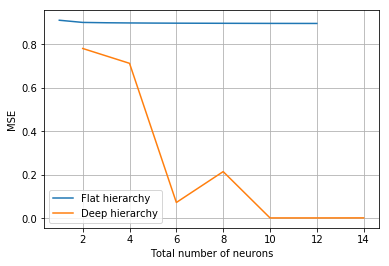

In [25]:
#Plot
plt.figure()
plt.plot([x for x in range(1, 13)], mse_flat, label = 'Flat hierarchy')
plt.plot([2 * x for x in range(1, 8)], mse_deep, label = 'Deep hierarchy')
plt.legend()
plt.xlabel('Total number of neurons')
plt.ylabel('MSE')
plt.grid()
plt.show()

3. Für geringe $n$ sind flache Netzwerke noch besser geeignet, da sie einen geringeren Fehler mit weniger Neuronen erzeugen können. Für höhere Dimensionen sind jedoch tiefe Netzwerke empfehlenswert, da sie mit deutlich geringerem Aufwand die besseren Ergebnisse erzielen.  
Diese Beobachtung entspricht auch der Gleichung (5), da für kleine Dimensionen der Overhead bei $net_d$ größer ist, für größere Dimensionen überwiegt jedoch das exponentielle Wachstum.